<a href="https://colab.research.google.com/github/kivancates/decision-tree-ele489/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


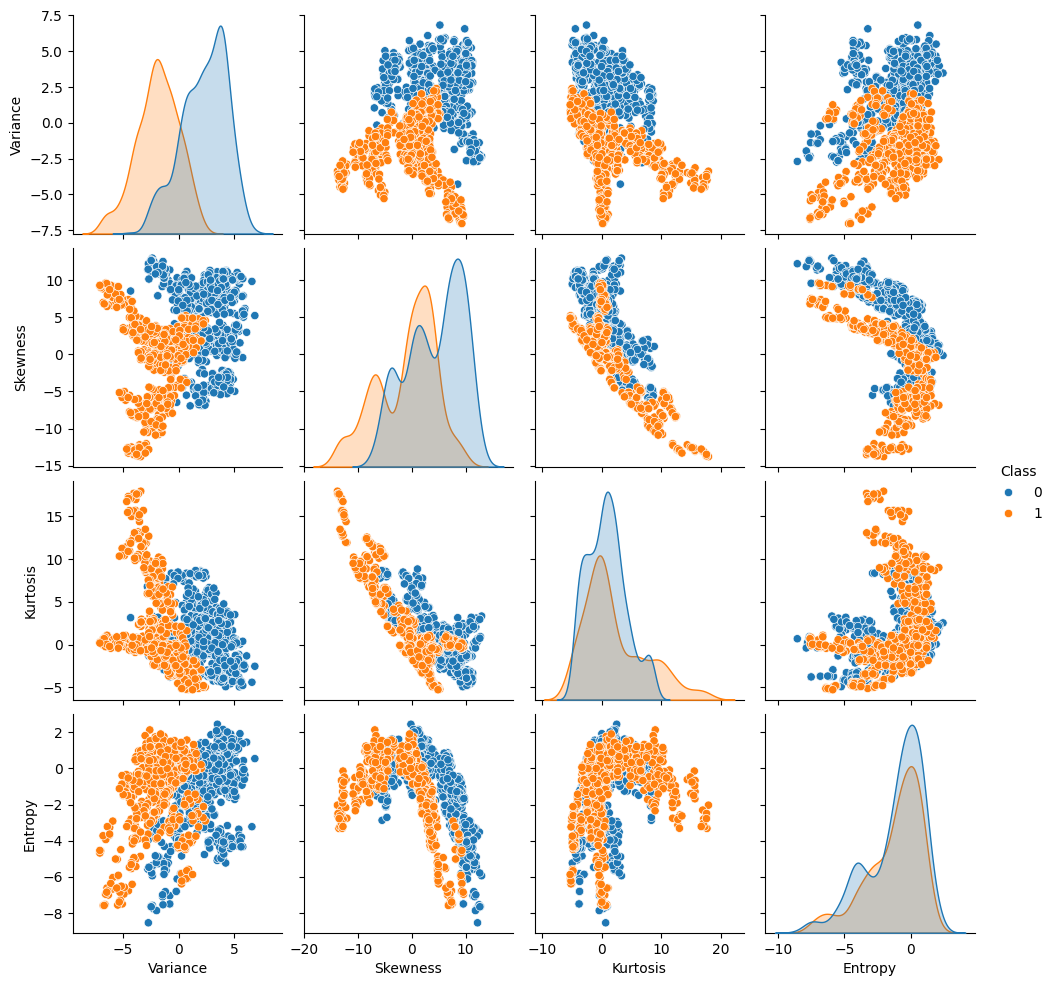

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy: 0.9855


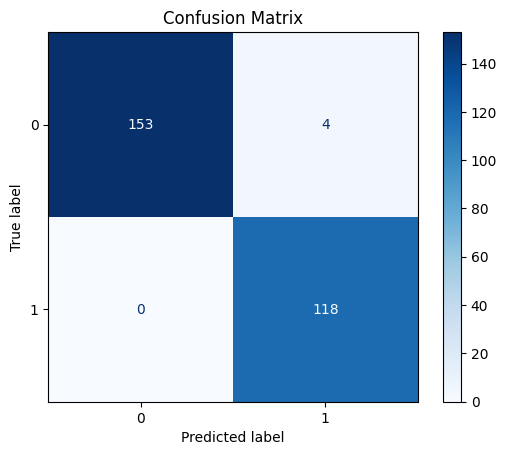

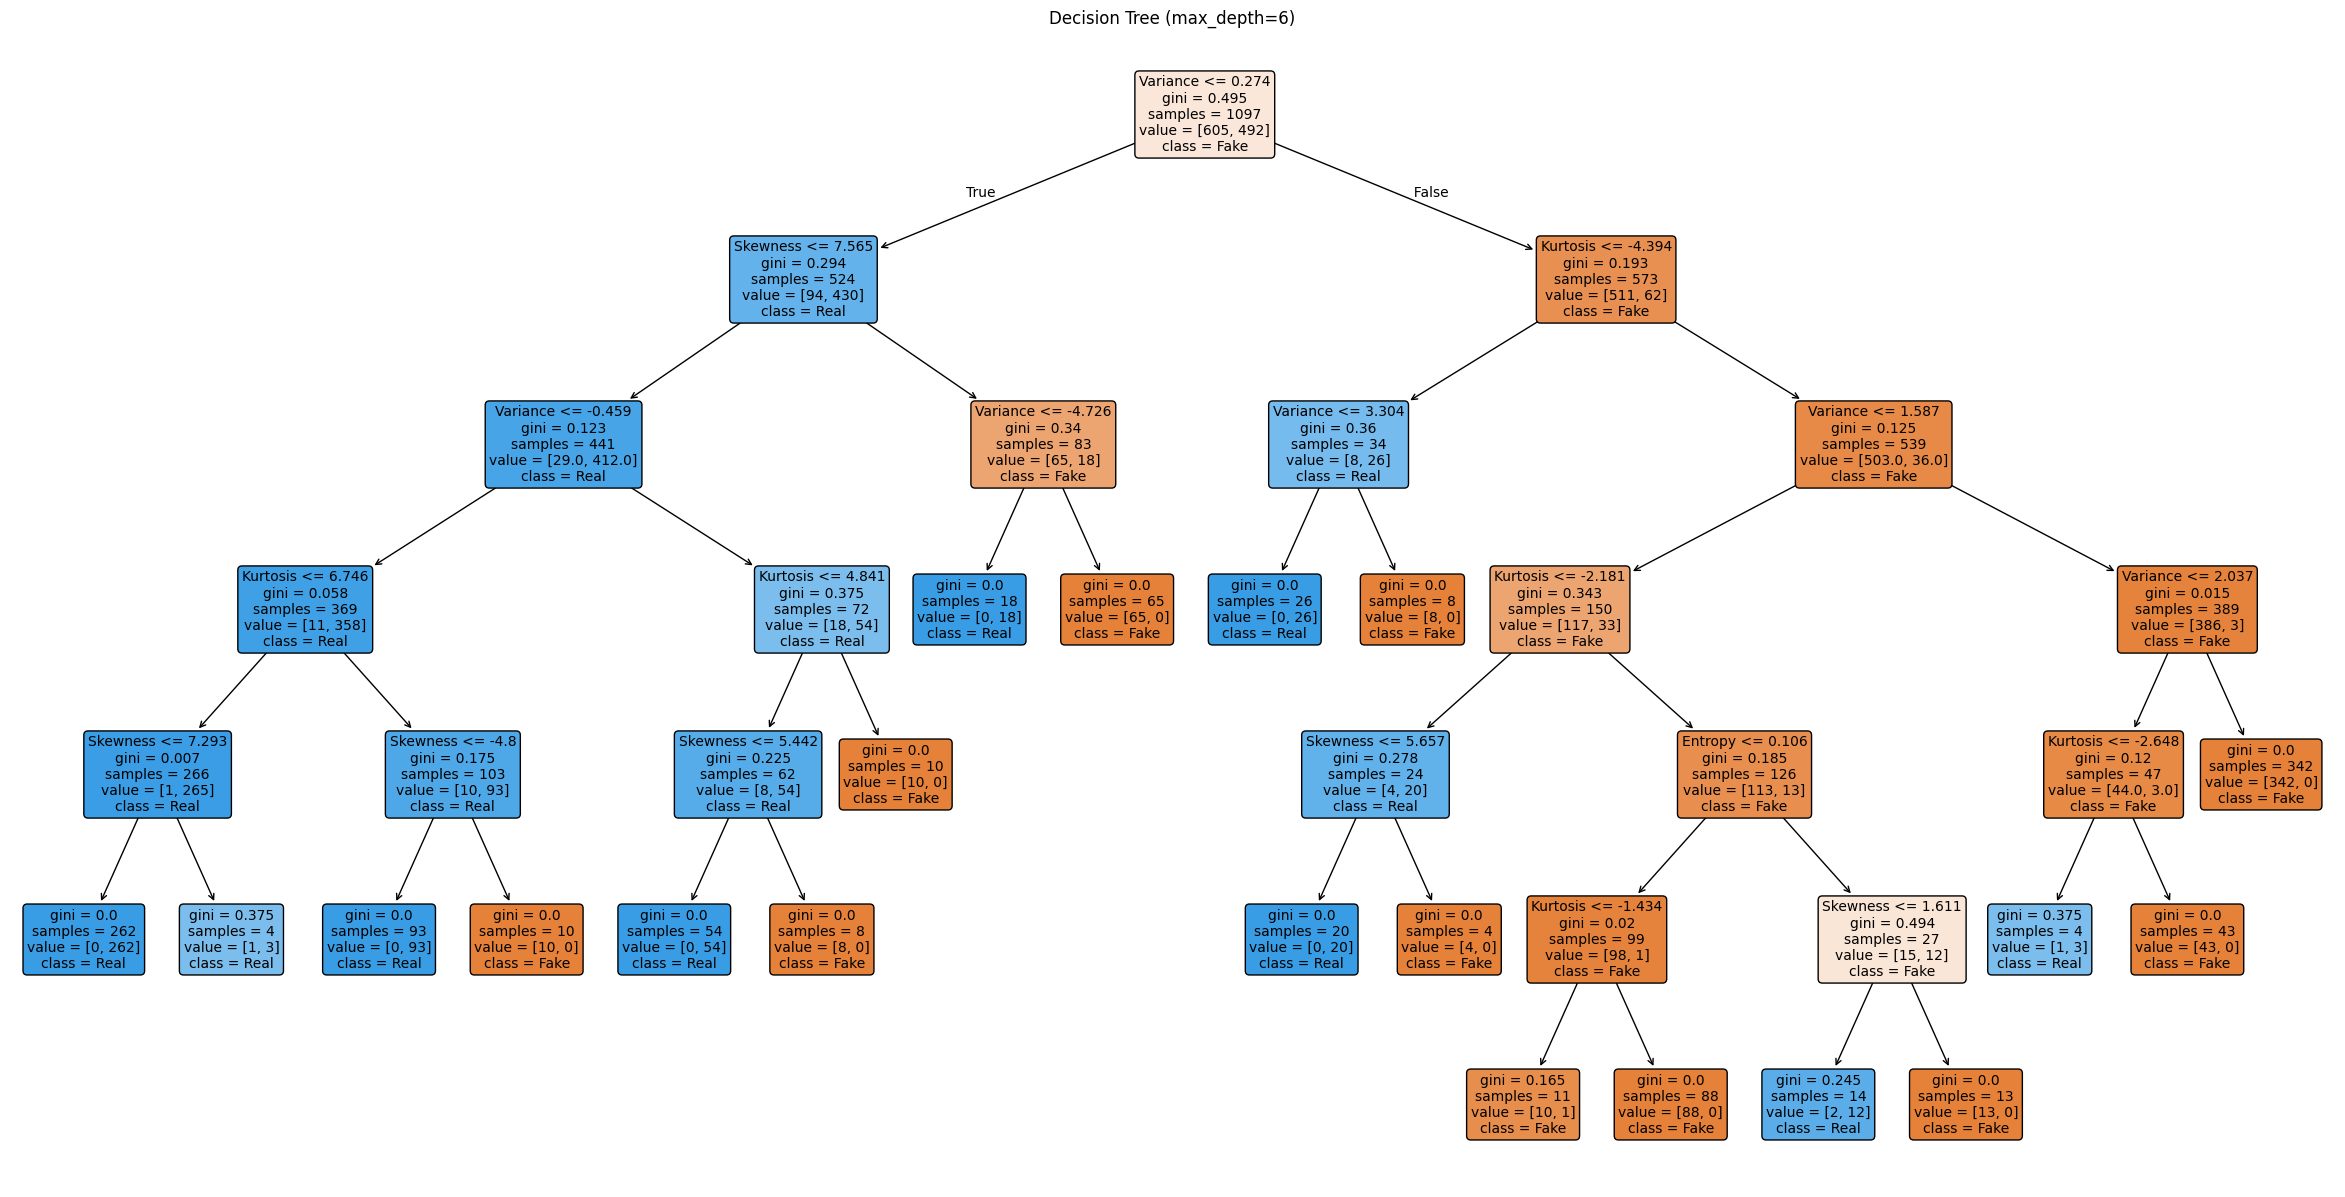

<ipython-input-58-5cb53835019d>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


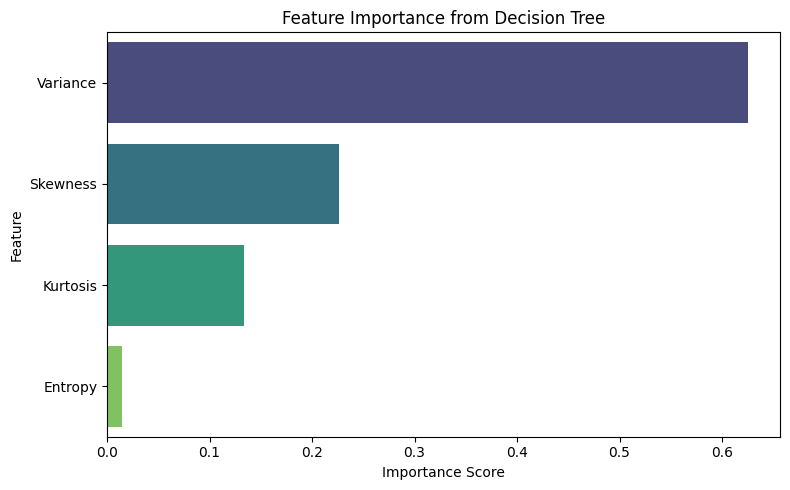

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree

column_names = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]
data = pd.read_csv('/content/data_banknote_authentication.txt',names = column_names)

#visualize dataset

sns.pairplot(data, hue="Class", diag_kind="kde")
plt.show()

X = data.iloc[:, :-1]  # All features (excluding class)
y = data['Class']  # Target variable

# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 7)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



plt.figure(figsize=(30,15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Fake', 'Real'],  # Assuming 0 = Fake, 1 = Real
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=6)")
plt.show()


# Get feature importance from the model
importances = clf.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

